In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense


In [3]:
df = pd.read_csv(r'C:\Users\Suyash Tambe\Desktop\ontdc\sunspots.csv')
df

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0
...,...,...
2815,1983-08,71.8
2816,1983-09,50.3
2817,1983-10,55.8
2818,1983-11,33.3


In [27]:
X.shape

(2820, 1)

In [29]:
y.shape

(2820,)

In [5]:
df.describe()

,Sunspots
count,2820.000000
mean,51.265957
std,43.448971
min,0.000000
25%,15.700000
50%,42.000000
75%,74.925000
max,253.800000


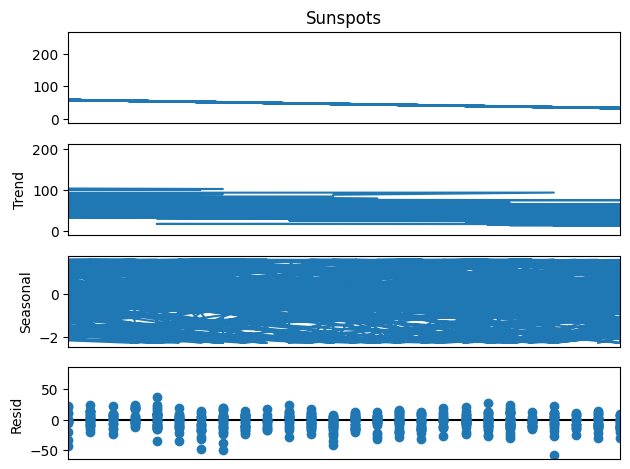

Epoch 1/50
71/71 - 1s - loss: 4531.7881 - 1s/epoch - 17ms/step
Epoch 2/50
71/71 - 0s - loss: 4467.7427 - 126ms/epoch - 2ms/step
Epoch 3/50
71/71 - 0s - loss: 4359.8149 - 102ms/epoch - 1ms/step
Epoch 4/50
71/71 - 0s - loss: 4206.0674 - 88ms/epoch - 1ms/step
Epoch 5/50
71/71 - 0s - loss: 4010.9521 - 92ms/epoch - 1ms/step
Epoch 6/50
71/71 - 0s - loss: 3783.8870 - 90ms/epoch - 1ms/step
Epoch 7/50
71/71 - 0s - loss: 3533.3596 - 91ms/epoch - 1ms/step
Epoch 8/50
71/71 - 0s - loss: 3268.1228 - 90ms/epoch - 1ms/step
Epoch 9/50
71/71 - 0s - loss: 2997.2197 - 94ms/epoch - 1ms/step
Epoch 10/50
71/71 - 0s - loss: 2731.4922 - 87ms/epoch - 1ms/step
Epoch 11/50
71/71 - 0s - loss: 2478.4026 - 88ms/epoch - 1ms/step
Epoch 12/50
71/71 - 0s - loss: 2245.0732 - 87ms/epoch - 1ms/step
Epoch 13/50
71/71 - 0s - loss: 2036.1687 - 85ms/epoch - 1ms/step
Epoch 14/50
71/71 - 0s - loss: 1853.5708 - 90ms/epoch - 1ms/step
Epoch 15/50
71/71 - 0s - loss: 1699.5933 - 87ms/epoch - 1ms/step
Epoch 16/50
71/71 - 0s - loss: 15

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense


df = pd.read_csv(r'C:\Users\Suyash Tambe\Desktop\ontdc\sunspots.csv')

# Extract features and labels
X = df['Sunspots'].values.reshape(-1, 1)  # Feature: Sunspots
y = df['Sunspots'].values  # Label: Sunspots (assuming it's a time series prediction)

# Check and visualize seasonality
date_index = pd.to_datetime(df['Sunspots'])
df.set_index(date_index, inplace=True)

result = seasonal_decompose(df['Sunspots'], model='additive', period=11)  # Adjust the period as needed
result.plot()
plt.show()

# Normalize features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Reshape X_train to make it 3D
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Build a simple CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1), padding='same'))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Flatten())
model.add(Dense(1, activation='linear'))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)

# Evaluate the model on the test set
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
loss = model.evaluate(X_test_reshaped, y_test, verbose=0)

print(f'Mean Squared Error on Test Set: {loss}')


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Load your dataset
# Assuming df is your DataFrame with 'Sunspots' column
# You may need to adjust the column names if necessary
df = pd.read_csv(r'C:\Users\Suyash Tambe\Desktop\ontdc\sunspots.csv')

# Extract features and labels
X = df['Sunspots'].values.reshape(-1, 1)  # Feature: Sunspots
y = df['Sunspots'].values  # Label: Sunspots (assuming it's a time series prediction)

# Normalize features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Reshape X_train to make it 3D
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Build a simple CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1), padding='same'))
model.add(MaxPooling1D(pool_size=2,padding ='same'))
model.add(Flatten())
model.add(Dense(1, activation='linear'))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=2)

# Evaluate the model on the test set
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
loss = model.evaluate(X_test_reshaped, y_test, verbose=0)

print(f'Mean Squared Error on Test Set: {loss}')

Epoch 1/10
71/71 - 1s - loss: 4515.1851 - 706ms/epoch - 10ms/step
Epoch 2/10
71/71 - 0s - loss: 4421.5615 - 149ms/epoch - 2ms/step
Epoch 3/10
71/71 - 0s - loss: 4269.1860 - 132ms/epoch - 2ms/step
Epoch 4/10
71/71 - 0s - loss: 4058.9810 - 127ms/epoch - 2ms/step
Epoch 5/10
71/71 - 0s - loss: 3799.2903 - 129ms/epoch - 2ms/step
Epoch 6/10
71/71 - 0s - loss: 3505.2183 - 120ms/epoch - 2ms/step
Epoch 7/10
71/71 - 0s - loss: 3191.3994 - 126ms/epoch - 2ms/step
Epoch 8/10
71/71 - 0s - loss: 2872.2200 - 125ms/epoch - 2ms/step
Epoch 9/10
71/71 - 0s - loss: 2564.0840 - 149ms/epoch - 2ms/step
Epoch 10/10
71/71 - 0s - loss: 2279.1914 - 92ms/epoch - 1ms/step
Mean Squared Error on Test Set: 2036.418701171875
